In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.shape

(5110, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df


In [ ]:
data1 = knn_impute(df, 'bmi')

In [ ]:
data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

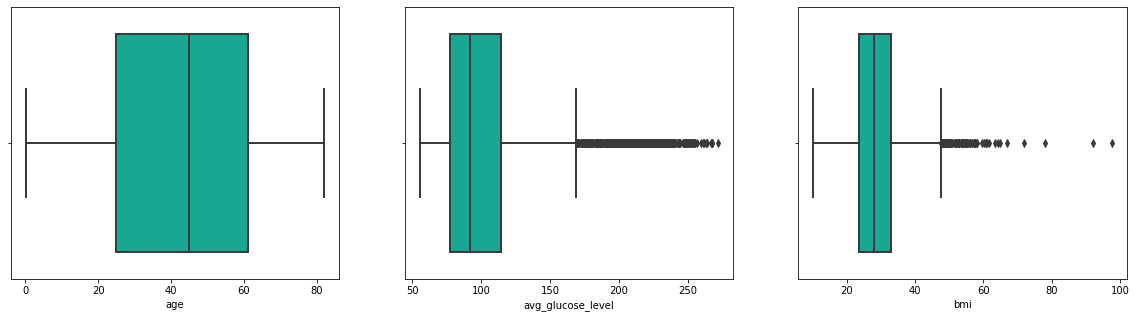

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(x = df['age'], ax= ax[0], color= '#00C0A1', linewidth= 2)
sns.boxplot(x = df['avg_glucose_level'], ax= ax[1], color= '#00C0A1', linewidth= 2)
sns.boxplot(x = df['bmi'], ax= ax[2], color= '#00C0A1', linewidth= 2)
plt.show()

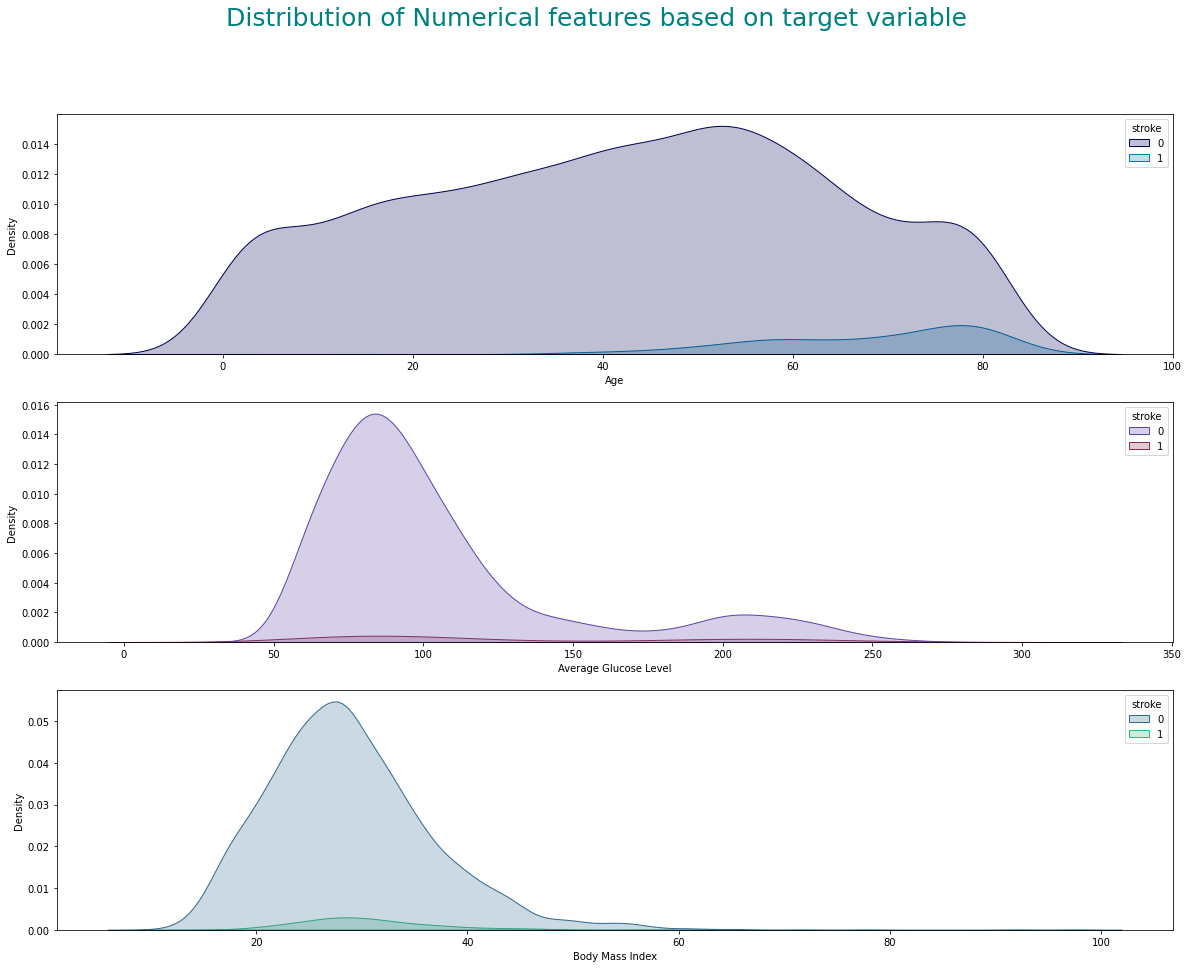

In [ ]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15))
plt.suptitle('Distribution of Numerical features based on target variable', fontsize = 25, color = 'teal')
sns.kdeplot(x = df['age'], hue= df['stroke'], shade= True, ax= ax[0], palette = 'ocean')
ax[0].set(xlabel = 'Age')
sns.kdeplot(x = df['avg_glucose_level'], hue= df['stroke'], shade= True, ax= ax[1], palette = 'twilight')
ax[1].set(xlabel = 'Average Glucose Level')
sns.kdeplot(x = df['bmi'], hue= df['stroke'], shade= True, ax= ax[2], palette = 'viridis')
ax[2].set(xlabel = 'Body Mass Index')
plt.show()

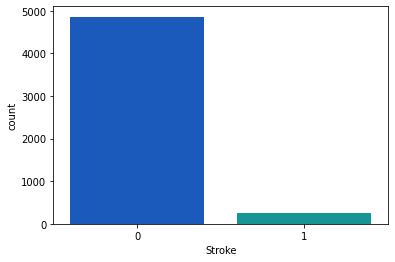

In [ ]:
sns.countplot(x = df['stroke'], palette= 'winter')
plt.xlabel('Stroke');

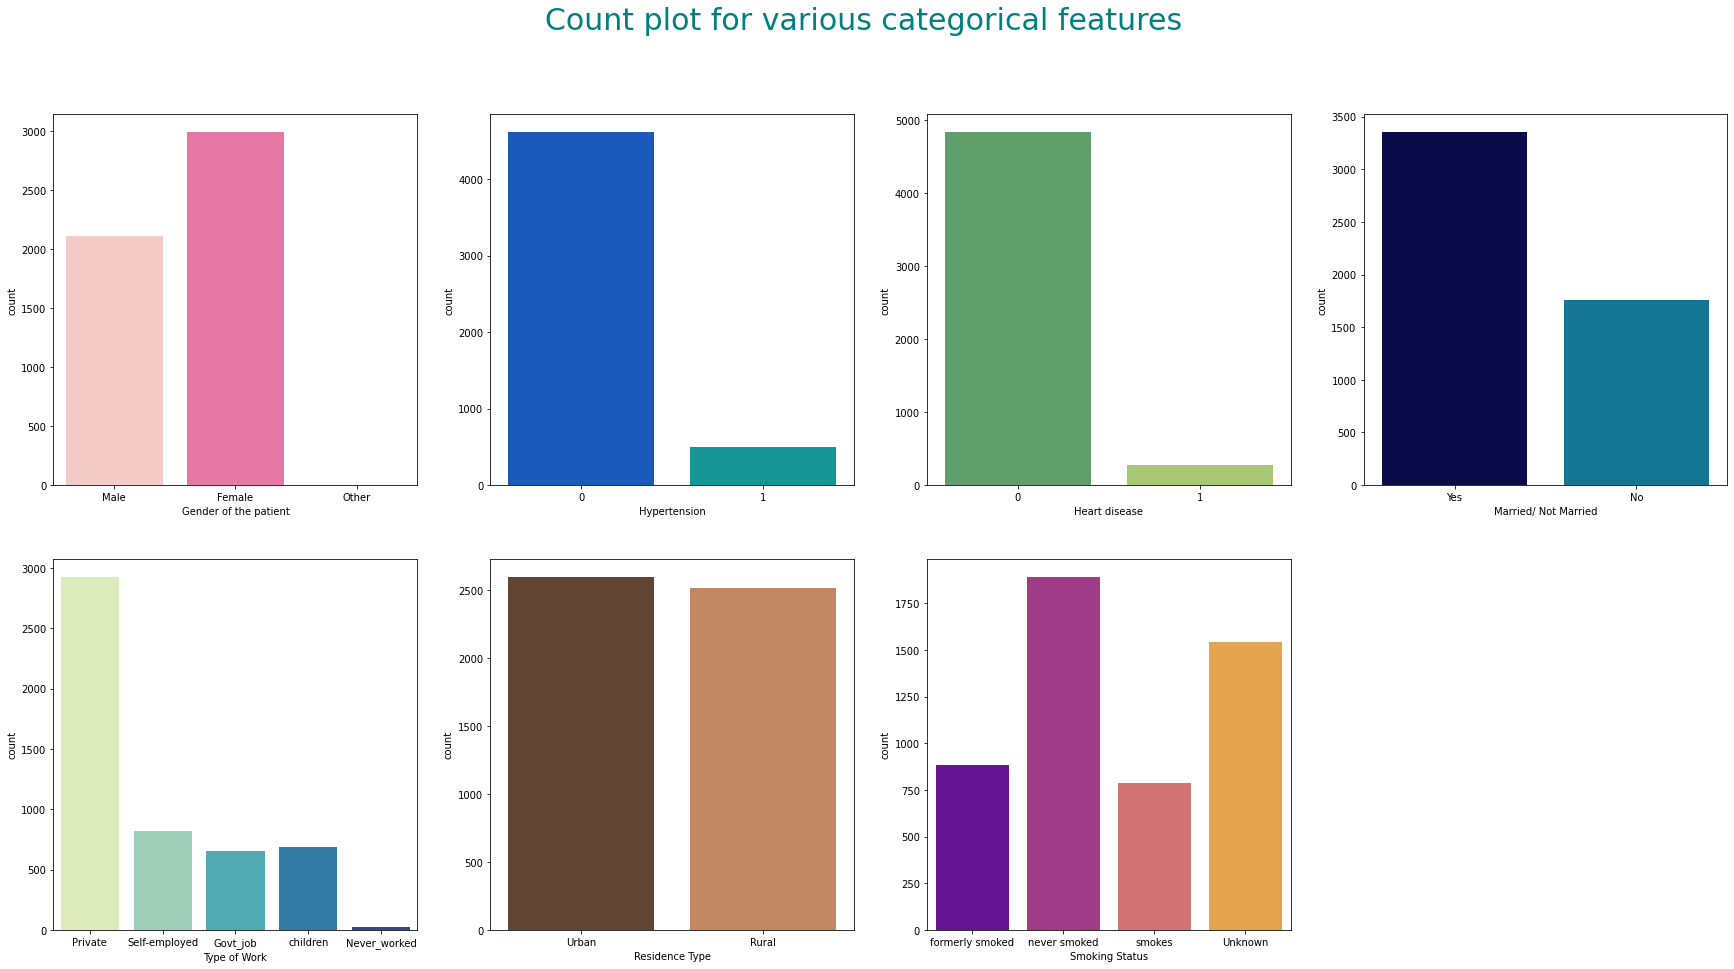

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= df, ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= df, ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= df, ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= df, ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= df, ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= df, ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= df, ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

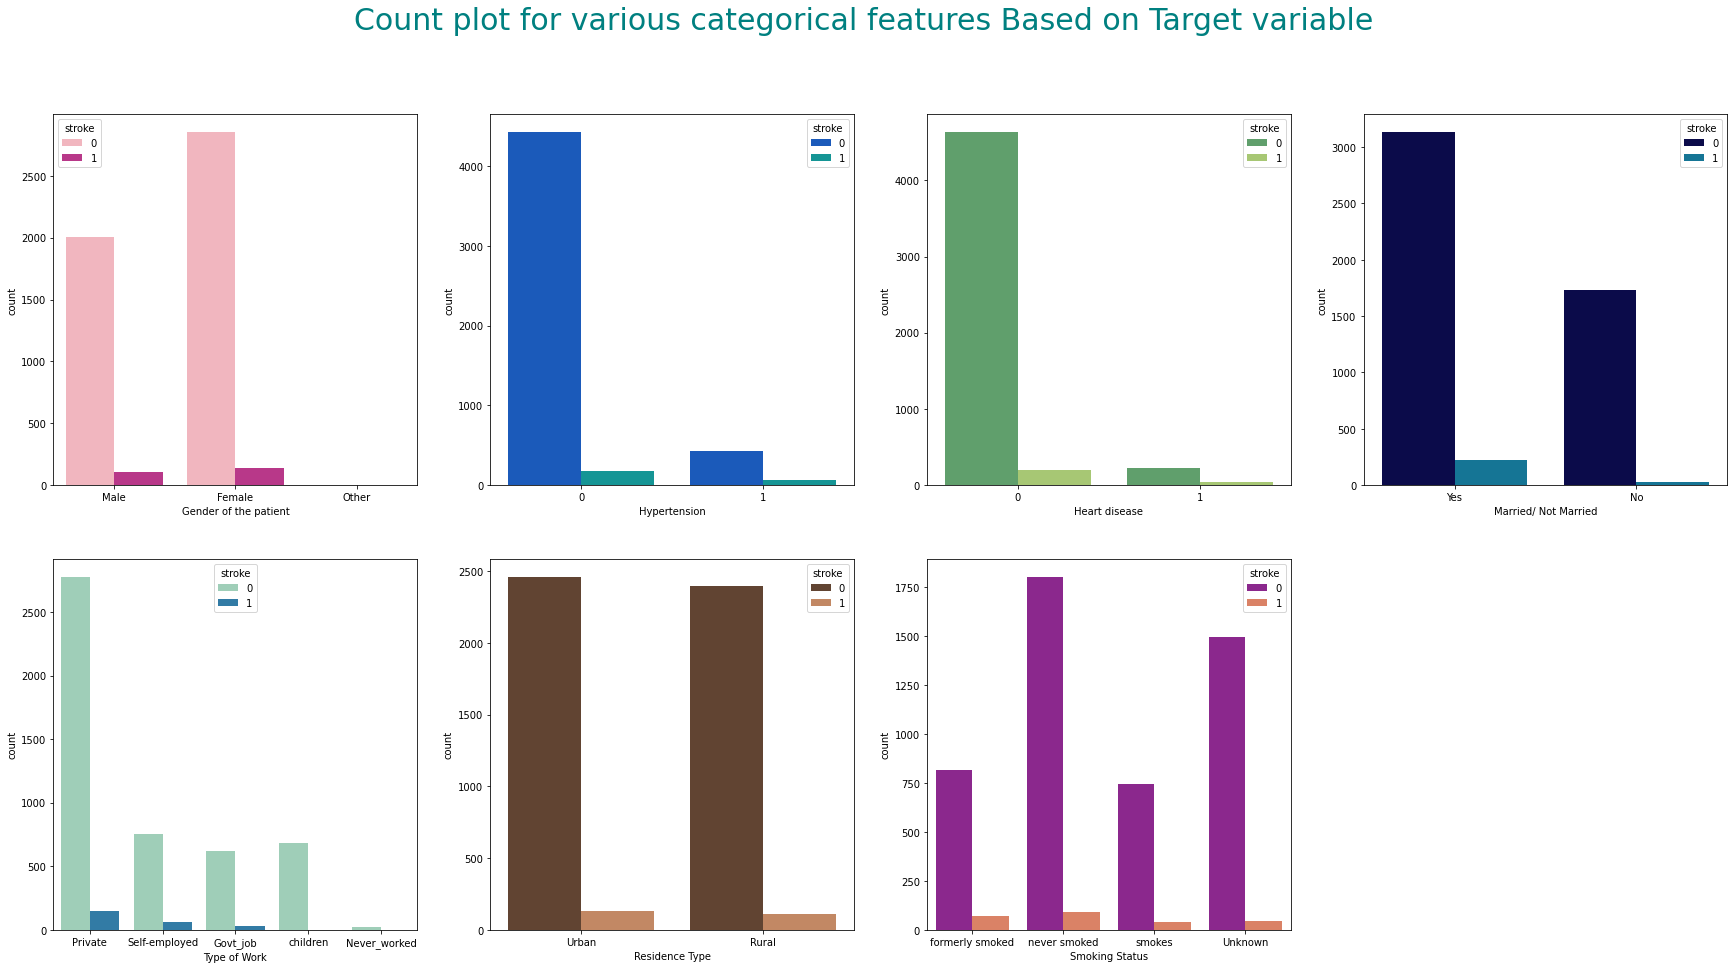

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various categorical features Based on Target variable', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='gender', data= df, hue= 'stroke', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= df, hue= 'stroke', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= df, hue= 'stroke', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= df, hue= 'stroke', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= df, hue= 'stroke', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= df, hue= 'stroke', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= df, hue= 'stroke', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [ ]:
data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.38,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
data=data1.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
X=data.drop(['stroke'],axis=1)
y=data['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

1    3891
0    3886
Name: stroke, dtype: int64
0    975
1    970
Name: stroke, dtype: int64


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Accuracy: 0.9748071979434447


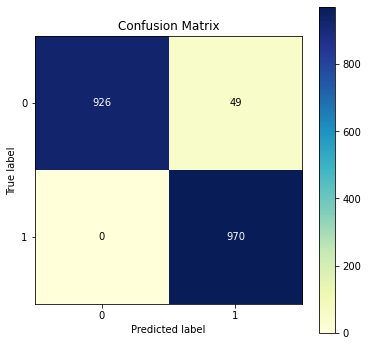

In [ ]:
!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import scikitplot as skplt
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))

THE MODEL USED IS 97% ACCURATE